In [4]:
#Simple feedforward neural network to learn the relationship between x and y = 2x + 3 using Pytorch

In [6]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 6.4 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Create a class for the model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        return x
    
    #Create a function to train the model
    def train(self, x, y, epochs=1000, lr=0.01):
        optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(epochs):
            optimizer.zero_grad()
            y_pred = self.forward(x)
            loss = F.mse_loss(y_pred, y)
            loss.backward()
            optimizer.step()
            if epoch % 100 == 0:
                print("Epoch: ", epoch, " Loss: ", loss.item())
    
    #Create a function to predict the output
    def predict(self, x):
        with torch.no_grad():
            y_pred = self.forward(x)
            return y_pred
    

In [9]:
#Create a function to generate random data
def generate_data(n=100):
    x = torch.rand(n, 1) * 10
    y = 2 * x + 3
    return x, y

#Create a function to plot the data
def plot_data(x, y):
    plt.scatter(x, y)
    plt.show()



In [10]:
#Create a function to plot the model's predictions
def plot_model(model, x, y):
    y_pred = model.predict(x)
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'r')
    plt.show()

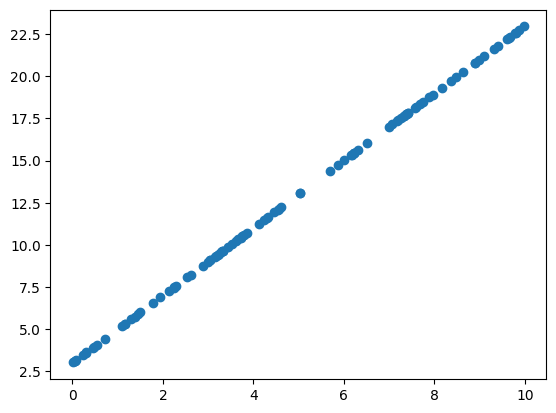

Epoch:  0  Loss:  125.00568389892578
Epoch:  100  Loss:  1.050899863243103
Epoch:  200  Loss:  0.36326804757118225
Epoch:  300  Loss:  0.12557196617126465
Epoch:  400  Loss:  0.04340658336877823
Epoch:  500  Loss:  0.015004385262727737
Epoch:  600  Loss:  0.005186658352613449
Epoch:  700  Loss:  0.0017929115565493703
Epoch:  800  Loss:  0.000619770959019661
Epoch:  900  Loss:  0.00021422687859740108


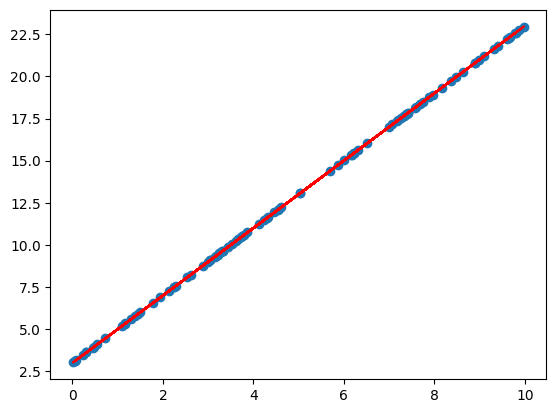

In [11]:
#Create a model
model = Net()
#Generate data
x, y = generate_data()
#Plot the data
plot_data(x, y)
#Train the model
model.train(x, y)
#Plot the model's predictions
plot_model(model, x, y)
